# Data Exploration and Cleaning

// Numpy is a library for matrices and arrays Short for Numerical Python
// Array creation: a=np.array([1,2,3,4,5,6],[3,6,4,4,5,5])		a[0,1] is 2 .... this is indexing
// a.shape	a.ndim
// Slicing b=a[1:3, :]

// Matplotlib is for visualization

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import csv

// some of data might not exist. In this case, we have to decide what we should do. 
//  There are many valid options:
// - forget/remove the nonexistent data,
// - replace it with a default value, 
// - interpolate (for time-series data), etc. 
// In our case, we're just substituting a reasonable value (zero).

In [4]:
def load_dataset ():
    num_rows = sum( 1 for line in open( './datasets/dataset_Facebook.csv' )) - 1
    X = np.zeros((num_rows, 1 ))
    y = np.zeros((num_rows, 1 ))
    with open( './datasets/dataset_Facebook.csv' ) as f:
        reader = csv.DictReader(f, delimiter= ';' )
        next(reader, None )
        for i, row in enumerate(reader):
            X[i] = int(row[ 'share' ]) if len(row[ 'share' ]) > 0 else 0
            y[i] = int(row[ 'like' ]) if len(row[ 'like' ]) > 0 else 0
    return X, y

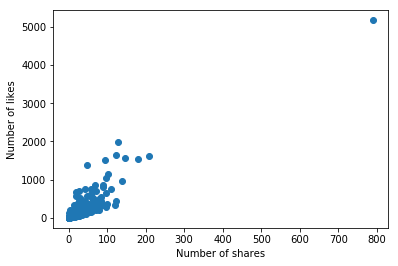

In [5]:
def visualize_dataset (X, y):
    plt.xlabel( 'Number of shares' )
    plt.ylabel( 'Number of likes' )
    plt.scatter(X, y)
    plt.show()

if __name__ == '__main__' :
    X, y = load_dataset()
    visualize_dataset(X, y)

# we notice a few things. 
//- There seems to be an outlier with around 800 shares and a little over 5000 likes. This might be an interesting post to investigate.
// -  most of our data are between 0 - 200 shares and 0 - 2000 likes, quite densely actually

In [7]:
import pandas as pd

In [8]:
fb_Data=pd.read_csv('./datasets/dataset_Facebook.csv', delimiter=';')

In [9]:
fb_Data.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


In [10]:
fb_Data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
